In [3]:
%matplotlib notebook

In [4]:
#Datasource: Crime Incidents in 2019 - Washington DC
#URL: http://opendata.dc.gov/datasets/crime-incidents-in-2019/data


# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import gmaps as gmaps



import random
import requests
#from googlesearch import search 


from pprint import pprint

# Google developer API key
import sys
sys.path.append('../')
from config import gkey


In [5]:
#Load Data

df = pd.read_csv("dccrime2019.csv")
df.head(2)


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.027565,38.897353,18221681,2019-01-01T10:24:06.000Z,DAY,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF F STREET NW,397609.0,136611.0,...,005800 1,5800.0,Precinct 129,38.897346,-77.027563,DOWNTOWN,2018-12-31T11:49:19.000Z,2018-12-31T14:43:21.000Z,247708257,18221681-01
1,-77.021929,38.899129,18221708,2019-01-01T15:48:01.000Z,EVENING,OTHERS,THEFT/OTHER,700 - 799 BLOCK OF 7TH STREET NW,398098.0,136808.0,...,005800 1,5800.0,Precinct 129,38.899121,-77.021926,DOWNTOWN,2018-12-31T12:48:46.000Z,2018-12-31T12:51:47.000Z,247708263,18221708-01


In [6]:
# Collecting a list of all columns within the DataFrame
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

In [7]:
# Reorganizing the columns using double brackets
crime_data = df[["OFFENSE","SHIFT","VOTING_PRECINCT","BLOCK","LATITUDE","LONGITUDE"]]
crime_data.head()

,OFFENSE,SHIFT,VOTING_PRECINCT,BLOCK,LATITUDE,LONGITUDE
0,THEFT/OTHER,DAY,Precinct 129,1100 - 1199 BLOCK OF F STREET NW,38.897346,-77.027563
1,THEFT/OTHER,EVENING,Precinct 129,700 - 799 BLOCK OF 7TH STREET NW,38.899121,-77.021926
2,THEFT/OTHER,DAY,Precinct 18,400 - 499 BLOCK OF M STREET NW,38.905635,-77.017559
3,THEFT F/AUTO,DAY,Precinct 79,1800 - 1899 BLOCK OF H STREET NE,38.900193,-76.976863
4,THEFT F/AUTO,MIDNIGHT,Precinct 36,1400 - 1499 BLOCK OF HARVARD COURT NW,38.926937,-77.033694


In [23]:
x = crime_data["OFFENSE"].count()
y = crime_data["VOTING_PRECINCT"].nunique()
z = crime_data["OFFENSE"].nunique()

avg = round(x/y)
avg = int(avg)

print(f"There are {x} crimes in this dataset.")
print(f"There are {z} distinct crimes in this dataset.")
print(f"There are {y} precincts in this dataset.")
print(f"There is an average of {avg} crimes per precinct in this dataset.")

#print(f"The average number of crimes per precinct are {z} in this dataset")

There are 1949 crimes in this dataset.
There are 8 distinct crimes in this dataset.
There are 139 precincts in this dataset.
There is an average of 14 crimes per precinct in this dataset.


In [27]:
#Crime types

offense = crime_data["OFFENSE"].value_counts()
offense

THEFT/OTHER                   767
THEFT F/AUTO                  752
ROBBERY                       118
MOTOR VEHICLE THEFT           107
BURGLARY                       93
ASSAULT W/DANGEROUS WEAPON     88
HOMICIDE                       13
SEX ABUSE                      11
Name: OFFENSE, dtype: int64

In [74]:
#Crime Precinct

precinct = crime_data["VOTING_PRECINCT"].value_counts()

precinct.head(5)
#precinctTop5 = precinct["VOTING_PRECINCT"].count()>39





Precinct 129    135
Precinct 83      75
Precinct 17      73
Precinct 76      48
Precinct 37      40
Name: VOTING_PRECINCT, dtype: int64

In [29]:
#crime = crime_data.loc[crime_data["OFFENSE"]=="SEX ABUSE"]

#crime.head(2)

,OFFENSE,SHIFT,VOTING_PRECINCT,BLOCK,LATITUDE,LONGITUDE
121,SEX ABUSE,EVENING,Precinct 81,500 - 599 BLOCK OF 19TH STREET NE,38.896482,-76.977175
340,SEX ABUSE,DAY,Precinct 77,1400 - 1499 BLOCK OF STAPLES STREET NE,38.904068,-76.983790


In [24]:
p83 = crime_data.loc[crime_data["VOTING_PRECINCT"]=="Precinct 83"]

In [44]:
p129offense = p129["OFFENSE"].value_counts()
p129offense

THEFT/OTHER                   71
THEFT F/AUTO                  60
ROBBERY                        2
MOTOR VEHICLE THEFT            1
ASSAULT W/DANGEROUS WEAPON     1
Name: OFFENSE, dtype: int64

In [36]:
#p129.groupby(["OFFENSE", "SHIFT"]).size()


OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  MIDNIGHT     1
MOTOR VEHICLE THEFT         DAY          1
ROBBERY                     DAY          1
                            EVENING      1
THEFT F/AUTO                DAY         21
                            EVENING     27
                            MIDNIGHT    12
THEFT/OTHER                 DAY         20
                            EVENING     41
                            MIDNIGHT    10
dtype: int64

In [38]:
#Precinct 83 is the Union Station area
p83.groupby(["OFFENSE", "SHIFT"]).size()

OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  EVENING      1
MOTOR VEHICLE THEFT         EVENING      2
ROBBERY                     EVENING      1
                            MIDNIGHT     6
THEFT F/AUTO                DAY          9
                            EVENING      6
                            MIDNIGHT     5
THEFT/OTHER                 DAY         16
                            EVENING     23
                            MIDNIGHT     6
dtype: int64

In [40]:
#Precinct 17 is the downtown area
p17.groupby(["OFFENSE", "SHIFT"]).size()

OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  EVENING      1
MOTOR VEHICLE THEFT         EVENING      2
ROBBERY                     EVENING      1
                            MIDNIGHT     6
THEFT F/AUTO                DAY          9
                            EVENING      6
                            MIDNIGHT     5
THEFT/OTHER                 DAY         16
                            EVENING     23
                            MIDNIGHT     6
dtype: int64

In [76]:
#Precincts and type of offenses
crime_data.groupby(["VOTING_PRECINCT","OFFENSE"]).size()


VOTING_PRECINCT  OFFENSE                   
Precinct 1       ASSAULT W/DANGEROUS WEAPON     1
                 MOTOR VEHICLE THEFT            1
                 ROBBERY                        1
                 THEFT F/AUTO                  12
                 THEFT/OTHER                   11
Precinct 10      MOTOR VEHICLE THEFT            1
                 THEFT/OTHER                    1
Precinct 100     ASSAULT W/DANGEROUS WEAPON     2
                 BURGLARY                       2
                 MOTOR VEHICLE THEFT            1
                 ROBBERY                        6
                 THEFT F/AUTO                   1
Precinct 101     MOTOR VEHICLE THEFT            1
                 THEFT F/AUTO                   2
                 THEFT/OTHER                    2
Precinct 102     ASSAULT W/DANGEROUS WEAPON     1
                 BURGLARY                       1
                 MOTOR VEHICLE THEFT            1
                 ROBBERY                        1
      

In [50]:
# Create a group based on the values in the 'maker' column
offense_group = crime_data.groupby('OFFENSE')

# Count how many times each maker appears in our group
count_offense = offense_group['OFFENSE'].count()

count_offense

OFFENSE
ASSAULT W/DANGEROUS WEAPON     88
BURGLARY                       93
HOMICIDE                       13
MOTOR VEHICLE THEFT           107
ROBBERY                       118
SEX ABUSE                      11
THEFT F/AUTO                  752
THEFT/OTHER                   767
Name: OFFENSE, dtype: int64

<IPython.core.display.Javascript object>


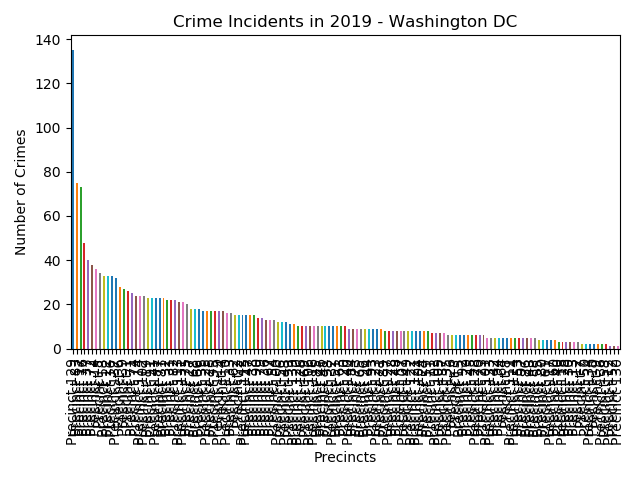

In [66]:
# Create a bar chart based off of the group series from before
count_chart = precinct.plot(kind='bar')

# Set the xlabel and ylabel using class methods
plt.title("Crime Incidents in 2019 - Washington DC")
#count_chart.set_xticks([offense_group['OFFENSE'].count()])
count_chart.set_xlabel("Precincts")
count_chart.set_ylabel("Number of Crimes")

# Create labels
#label = ['88', '93', '13', '107', '118', '11', '752', '767']
 
# Text on the top of each barplot
#for i in range(len(label)):
#    plt.text(label[i], size = 6)
    

plt.show()
plt.tight_layout()
plt.savefig("dccrime2019_precincts.png")

In [65]:
crime_data.head(2)

,OFFENSE,SHIFT,VOTING_PRECINCT,BLOCK,LATITUDE,LONGITUDE
0,THEFT/OTHER,DAY,Precinct 129,1100 - 1199 BLOCK OF F STREET NW,38.897346,-77.027563
1,THEFT/OTHER,EVENING,Precinct 129,700 - 799 BLOCK OF 7TH STREET NW,38.899121,-77.021926


In [ ]:
######################## Converting a GroupBy object into a DataFrame
international_duration = pd.DataFrame(
    grouped_international_data["duration (seconds)"].sum())
international_duration.head(10)

In [ ]:
new_df = crime_data({"Crime":crime_data["OFFENSE"],
               "Count":file["Grade"]}) 
new_df.head(5)

In [8]:
#location = crime.loc[crime("LATITUDE", "LONGITUDE")]
location = ["38.854078","-76.972223"]
location

['38.854078', '-76.972223']

In [10]:
#Geo-location

fig = gmaps.figure()
print(location) 
marker_layer = gmaps.marker_layer(location)
#fig.add_layer(marker_layer)
fig

['38.854078', '-76.972223']


ValueError: too many values to unpack (expected 2)

C:\Users\reena\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
